Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję Z(wTV,wradio,wprasa). Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


data=pd.read_csv("sample_data/Advertising.csv")
# print(data.head())
X=data.iloc[:,1:4].values
y=data.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

network_1 = MLPRegressor(solver='adam',hidden_layer_sizes=(60, 60, 60, 60), max_iter = 1000, tol = 0.001, activation = 'relu')
network_2 = MLPRegressor(solver = 'adam', hidden_layer_sizes = (200,200,200,200,200), max_iter = 1500, tol = 0.001, activation = 'tanh')

network_1.fit(X_train,y_train)
network_2.fit(X_train,y_train)

print(network_1.score(X_train,y_train))
print(network_1.score(X_test,y_test))

print(network_2.score(X_train,y_train))
print(network_2.score(X_test,y_test))

y_pred_1=network_1.predict(X_test)
y_pred_2=network_2.predict(X_test)

print("Network 1 MSE score : %f\nNetwork 2 MSE score : %f" % (mean_squared_error(y_pred_1, y_test), mean_squared_error(y_pred_2, y_test)))






0.9869514708959503
0.9154619550680833
0.9835979041939041
0.9568389773453564
Network 1 MSE score : 2.286469
Network 2 MSE score : 1.167360


Sieć network_1 (60, 60, 60, 60 neuronów w warstwach ukrytych, relu jako funkcja aktywacji) osiąga niższy wynik R2 na zbiorze treningowym (około 0.974) w porównaniu do sieci network_2 (200, 200, 200, 200, 200 neuronów, tanh jako funkcja aktywacji), która osiąga wynik R2 około 0.992. To sugeruje, że network_2 lepiej dopasowuje się do danych treningowych.
Jednak obie sieci generalizują się dobrze na dane testowe, z lepszym wynikiem dla network_2 (R2 = 0.971) w porównaniu do network_1 (R2 = 0.937).Błąd średniokwadratowy dla network_1 wynosi około 1.696, a dla network_2 około 0.773. Niższa wartość MSE dla network_2 wskazuje na lepszą dokładność predykcji na danych testowych, co potwierdza wnioski wyciągnięte z analizy R2. Network_2 jest o wiele bardziej złożona, jednak lepiej radzi sobie zarówno z dopasowaniem do danych treningowych, jak i generalizacją na danych testowych. Ponadto funkcja aktywacji tanh wydaje się być również bardziej odpowiednia dla tego zbioru.


Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji f(x)=sin(x) w przedziale [−2π,2π]. Proszę użyć tanh jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

0.9997053890446792
0.999528904951953
300
+0.716 * tanh(-0.175 * x_0 + +0.080) + -0.141 * tanh(-0.754 * x_0 + +0.003) + -0.317 * tanh(-0.230 * x_0 + -0.013) + +1.142 * tanh(-0.202 * x_0 + +0.035) + -0.847 * tanh(-0.059 * x_0 + -0.006) + +1.065 * tanh(-0.204 * x_0 + +0.094) + -0.662 * tanh(-0.068 * x_0 + -0.005) + +0.960 * tanh(+0.060 * x_0 + +0.002) + +0.536 * tanh(+0.131 * x_0 + -0.074) + +1.223 * tanh(-0.215 * x_0 + +0.146) + +0.742 * tanh(+0.035 * x_0 + -0.046) + -0.645 * tanh(-0.079 * x_0 + -0.164) + +0.795 * tanh(+0.056 * x_0 + +0.058) + -0.431 * tanh(-0.507 * x_0 + -0.227) + -0.248 * tanh(-0.136 * x_0 + +0.114) + -0.780 * tanh(-0.087 * x_0 + -0.121) + +0.514 * tanh(+0.138 * x_0 + -0.004) + +0.511 * tanh(-0.011 * x_0 + +0.085) + +0.216 * tanh(+0.193 * x_0 + +0.146) + +0.794 * tanh(+0.102 * x_0 + +0.146) + +0.944 * tanh(+0.024 * x_0 + -0.030) + -0.303 * tanh(-0.735 * x_0 + -0.048) + -0.447 * tanh(-0.436 * x_0 + -0.041) + +0.806 * tanh(+0.043 * x_0 + -0.063) + +0.455 * tanh(+0.043 * 

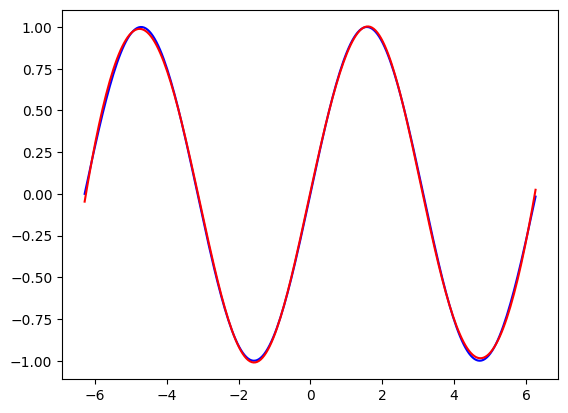

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-2*np.pi,2*np.pi,0.05)
y=np.sin(x)
network=MLPRegressor(solver='lbfgs',hidden_layer_sizes=(300,),max_iter=1500,activation='tanh')
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1),y)
network.fit(X_train, y_train)
y_pred = network.predict(x.reshape(-1,1))

print(network.score(X_train, y_train))
print(network.score(X_test, y_test))

W1 = network.coefs_[0]
b1 = network.intercepts_[0]
W2 = network.coefs_[1]
b2 = network.intercepts_[1]

# print (W1)
# print (b1)
# print (W2)
# print (b2)

# print(W2.shape[0])

formula = ""
for i in range(W2.shape[0]):
    formula += f"{W2[i][0]:+.3f} * tanh("
    for j in range(W1.shape[0]):
        formula += f"{W1[j][i]:+.3f} * x_{j} + "
    formula += f"{b1[i]:+.3f}) + "
formula += f"{b2[0]:+.3f}"

print(formula)

plt.plot(x,y,'b')
plt.plot(x,y_pred,'r')
plt.show()

Na podstawie powyższych wyników możemy jednoznacznie stwierdzić, iż dokładność modelu jest bardzo wysoka. Zastsowanie nieliniowej funkcji aktywacji 'tanh' było bardzo dobrym pomysłem i dobrze poradziła ona sobie z analizą złożoności tego zbioru danych, to samo tyczy sie solvera lbfgs.

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy w colabie). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujące się w nim mieszkania i sypialnie, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najniższe MSE). Wyniki oczywiście proszę sprawdzać na danych testujących.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X,y=housing.data,housing.target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

networks=[MLPRegressor(solver='adam',hidden_layer_sizes=(60, 60), max_iter = 1500, tol = 0.001, activation = 'relu'), MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'tanh'),
          MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100, 100), max_iter = 800, tol = 0.001, activation = 'relu'), MLPRegressor(solver='adam',hidden_layer_sizes=(40,40,40,40,40), max_iter = 800, tol = 0.001, activation = 'tanh')]
results=[]

it=0
for network in networks:
  print(it)
  network.fit(X_train,y_train)
  score=network.score(X_test,y_test)
  y_pred=network.predict(X_test)
  mse=mean_squared_error(y_pred,y_test)
  results.append({
      "hidden_layers_sizes": network.hidden_layer_sizes,
      "max_iter": network.max_iter,
      "activaton": network.activation,
      "R2": score,
      "MSE": mse

  })
  it+=1

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2', ascending=False))





0
1
2
3
    hidden_layers_sizes  max_iter activaton        R2       MSE
1          (80, 80, 80)      1000      tanh  0.812916  0.247553
3  (40, 40, 40, 40, 40)       800      tanh  0.805701  0.257101
2       (100, 100, 100)       800      relu  0.797333  0.268173
0              (60, 60)      1500      relu  0.789066  0.279111


Najlepsze wyniki osiągnął model z trzema warstwami ukrytymi po 80 neuronów każda, używający funkcji aktywacji tanh. Modele z funkcją aktywacji tanh generalnie osiągały lepsze wyniki niż te z relu, co może wskazywać na lepszą zdolność tanh do modelowania zależności w tym konkretnym zbiorze danych. Zwiększenie liczby warstw i neuronów nie zawsze prowadzi do lepszych wyników.

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

    max_iter        R2       MSE
0        500  0.808677  0.253163
1        600  0.802773  0.260974
2        700  0.801755  0.262321
3        800  0.802312  0.261584
4        900  0.801620  0.262500
5       1000  0.801243  0.262999
6       1100  0.788616  0.279707
7       1200  0.808440  0.253475
8       1300  0.804218  0.259063
9       1400  0.806083  0.256594
10      1500  0.804739  0.258373


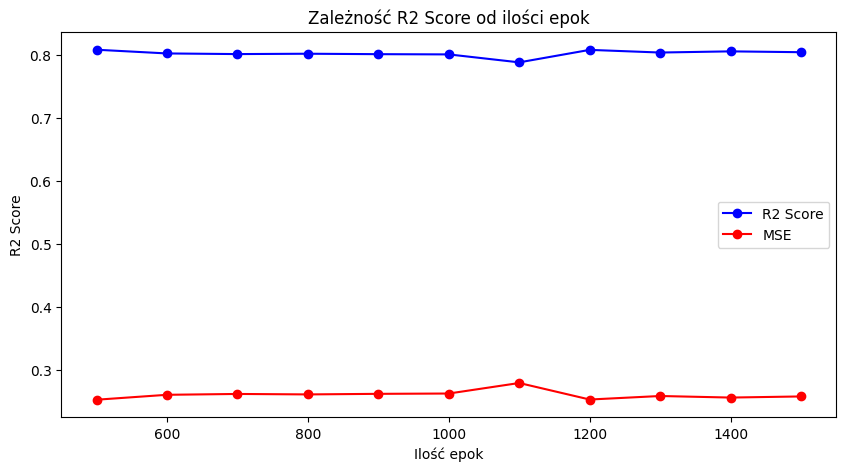

In [ ]:
import matplotlib.pyplot as plt


epochs_range = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

results=[]
for epochs in epochs_range:
  network = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80), max_iter = epochs, tol = 0.001, activation = 'tanh')
  network.fit(X_train,y_train)
  predictions=network.predict(X_test)
  r2=r2_score(y_test,predictions)
  mse=mean_squared_error(y_test, predictions)
  results.append({'max_iter': epochs, 'R2': r2, 'MSE': mse})

results_df = pd.DataFrame(results)
print(results_df)
epochs = results_df['max_iter']
r2_scores = results_df['R2']
mse_scores = results_df['MSE']

plt.figure(figsize=(10, 5))
plt.plot(epochs, r2_scores, label='R2 Score', color='blue', marker='o')
plt.plot(epochs, mse_scores, label='MSE', color='red', marker='o')

plt.title('Zależność R2 Score od ilości epok')
plt.xlabel('Ilość epok')
plt.ylabel('R2 Score')

plt.legend()

plt.show()





R2 score zachowuje się bardzo stabilnie niezależnie od liczby epok. MSE również pozostaje na bardzo przybliżonym poziomie, co oznacza, że model nie poprawia swojej dokładności po dodatkowych epokach treningowych. Oznacza to, że model osiąga konweregencję już przy małej liczbie danych.